# 🧠 Machine Learning Basics: Workflow and Train-Test Split

**Goals:**
- Understand supervised vs unsupervised learning
- Follow the basic ML workflow
- Practice data splitting for honest evaluation
- Run simple supervised and unsupervised learning tasks

**Why:**
A solid grasp of ML fundamentals and data splitting sets you up for every future data science and AI project.

## 1. Key Concepts: What is Machine Learning?

**Machine learning** lets computers learn patterns from data rather than explicit instructions. There are two main types:
- **Supervised Learning**: The model learns from labeled data (the "answer" is known). Ex: Predicting house prices, spam detection
- **Unsupervised Learning**: The model learns patterns or groupings from data without labels. Ex: Customer segmentation, clustering

![ML Types Diagram](https://miro.medium.com/v2/resize:fit:720/format:webp/1*DN3wZINjGDnt01H1UGAQZw.png)

*Image: Supervised vs. Unsupervised machine learning tasks*

## 2. The ML Workflow
A typical ML workflow follows these steps:
1. **Data Collection & Exploration (EDA)**
2. **Data Cleaning & Preprocessing**
3. **Train-Test Split** (to ensure unbiased evaluation)
4. **Model Choice & Training**
5. **Evaluation** (using test data)
6. **Interpretation, Adjustment, or Deployment**

We'll walk through *all* of these.

## 3. Setup: Libraries and Sample Data
We'll use pandas, numpy, and sklearn for our examples.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

## 4. Supervised Learning: Classification Example (Titanic Data)

**Goal:** Predict whether a passenger survived (1) or not (0).

In [5]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Basic EDA
display(titanic.head())
display(titanic.info())
display(titanic.isna().sum())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Handle missing values for demo:** We'll drop rows with missing values for key columns.

In [6]:
titanic_clean = titanic.dropna(subset=['age', 'fare', 'embarked', 'sex'])

# Encode categorical variables
titanic_clean['sex_male'] = (titanic_clean['sex'] == 'male').astype(int)
titanic_clean['embarked_C'] = (titanic_clean['embarked'] == 'C').astype(int)
titanic_clean['embarked_Q'] = (titanic_clean['embarked'] == 'Q').astype(int)
# (R or S can be inferred)

features = ['pclass', 'age', 'fare', 'sex_male', 'embarked_C', 'embarked_Q']
X = titanic_clean[features]
y = titanic_clean['survived']

### **Train-Test Split: The Heart of Honest ML!**
- We'll split 75% for training, 25% for testing.
- NEVER peek at test labels during training!

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 534
Test set size: 178


### **Train and Evaluate a Model**
Let's use logistic regression for binary classification.

In [8]:
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.7865168539325843
Confusion matrix:
[[86 13]
 [25 54]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        99
           1       0.81      0.68      0.74        79

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.78       178



- **Try It:** Change features, split proportion, or model to DecisionTreeClassifier and re-run.
- **Why split data this way?**
Ensures evaluation is on *unseen* examples—preventing overly optimistic results!

## 5. Unsupervised Learning: Clustering (Iris Dataset Example)
No labels! We'll discover groups (clusters) on the famous iris flower dataset.

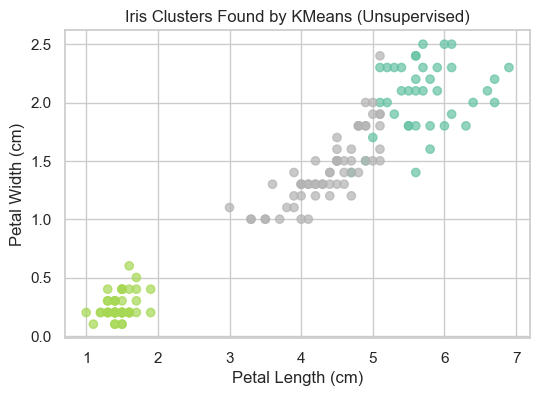

In [9]:
iris = load_iris(as_frame=True)
X_iris = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_iris)

# Visualize with two features
plt.figure(figsize=(6,4))
plt.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'], c=cluster_labels, cmap='Set2', alpha=0.7)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Clusters Found by KMeans (Unsupervised)")
plt.show()

## 6. Summary & Next Steps
- You now know how to split data, train & evaluate a supervised ML model, and try unsupervised clustering.
- Try different features, datasets, or train/test proportions.
- Sketch your workflow process or flowchart (by hand or digitally) to reinforce your understanding.

## 7. Exercise Ideas
- Try using more features from Titanic or Iris.
- Swap logistic regression for decision tree, or try other scikit-learn models.
- Use a different ratio for train/test split (e.g., 80/20) and see how results change.
- Can you improve accuracy by handling missing data differently or engineering new features?
- Upload your own dataset and repeat the ML workflow!

Happy modeling! 🚀